In [1]:
import pandas as pd
import openpyxl as px
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import unicodedata
import emoji
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('stopwords')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
SPANISH_STOPWORDS = set(stopwords.words('spanish'))


[nltk_data] Downloading package wordnet to /home/cesar_r/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/cesar_r/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cesar_r/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
comentarios_clientes = pd.read_csv('../datos_excel/comentarios_limpios.csv')

In [4]:
comentarios_clientes.columns.tolist()

['calificacion', 'comentarios']

## Eliminar comentarios duplicados

In [5]:
# Ver cuántos duplicados hay antes de eliminar
print(f"Filas totales: {len(comentarios_clientes)}")
print(f"Filas duplicadas: {comentarios_clientes['comentarios'].duplicated().sum()}")

Filas totales: 2073
Filas duplicadas: 985


In [6]:
comentarios_clientes_sin_duplicados = comentarios_clientes.drop_duplicates(subset=['comentarios']).dropna(subset=['comentarios']).reset_index(drop=True)
len(comentarios_clientes_sin_duplicados)

1088

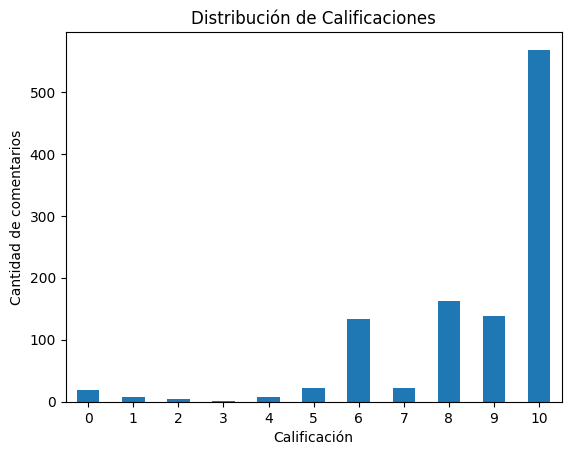

In [7]:
# Gráfica de barras de calificaciones
comentarios_clientes_sin_duplicados['calificacion'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Calificación')
plt.ylabel('Cantidad de comentarios')
plt.title('Distribución de Calificaciones')
plt.xticks(rotation=0)
plt.show()

In [8]:
comentarios_clientes_sin_duplicados['Clasificacion'] = None

In [9]:
comentarios_clientes_sin_duplicados.to_csv('../datos_excel/comentarios_sin_duplicados.csv')

In [10]:
clasificacion_clientes = {
    -1: 'detractor',
    0: 'neutro',
    1: 'promotor'
}

In [ ]:
# Etiquetado manual de las primeras 25 filas

comentarios_clientes_sin_duplicados['Clasificacion'].iloc[0] = -1 
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[1] = -1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[2] = -1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[3] = -1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[4] = -1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[5] = -1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[6] = 1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[7] = 1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[8] = 1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[9] = 1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[10] = 1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[11] = 1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[12] = 1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[13] = 1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[14] = 1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[15] = 1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[16] = 1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[17] = 1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[18] = 1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[19] = 1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[20] = 1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[21] = 1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[22] = 1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[23] = 1
comentarios_clientes_sin_duplicados['Clasificacion'].iloc[24] = 1       

/tmp/ipykernel_64074/4279171356.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  comentarios_clientes_sin_duplicados['Clasificacion'].iloc[0] = -1
/tmp/ipykernel_64074/4279171356.py:1: SettingWithCopyWarning: 
A value is trying to be set 

In [15]:
comentarios_clientes_sin_duplicados.head(25)

,calificacion,comentarios,Clasificacion
0,6,pesimo servicio en la agencia,-1
1,9,nos tardaron mas de 1 hora en recibir y no nos...,None
2,8,hace falta mas comunicacion con los asesores n...,None
3,8,no lo quisieron recibir,None
4,6,el asesor que me toco muy mala atencion la ver...,None
5,8,"la recepcion del vehiculo bien, puntualidad en...",None
6,6,"existe una situacion complicada, ya que me ent...",None
7,8,la misma aplicacion me cambio la fecha que hab...,None
8,6,pedi que se cambiara el filtro de cabina y los...,None
9,6,el servicio estuvo deficiente y no se hizo al ...,None


In [12]:
NEGATIONS = {"no", "nunca", "jamás", "ni", "nadie", "nada", "ninguno", "ninguna"}
SPANISH_STOPWORDS_SANS_NEG = SPANISH_STOPWORDS - NEGATIONS

STEMMER_ES = SnowballStemmer('spanish')

# Carga opcional de Spacy para lematizar en español
try:
    import spacy
    try:
        NLP_ES = spacy.load("es_core_news_sm", disable=["ner", "parser", "tok2vec", "senter"])
    except OSError:
        # Si el modelo no está instalado, usa un pipeline vacío (lemmatiza pobremente)
        NLP_ES = spacy.blank("es")
except Exception:
    NLP_ES = None  # lematización deshabilitada si no hay spacy



In [13]:
def preprocess_text(text, stop_words=True, stemming=True, lemmatization=True):
    # Convertir a minúsculas
    text = text.lower()

    # Eliminar puntuación y emojis
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = emoji.replace_emoji(text, replace='')

    # Tokenización
    tokens = word_tokenize(text)
    
    # Eliminar stopwords
    if stop_words:
        tokens = [word for word in tokens if word not in SPANISH_STOPWORDS_SANS_NEG]

    # Stemming y lematización
    if stemming:
        tokens = [STEMMER_ES.stem(word) for word in tokens]
    if lemmatization and NLP_ES:
        tokens = [token.lemma_ for token in NLP_ES(tokens)]

    return ' '.join(tokens)

In [14]:
comentarios_clientes_sin_duplicados['comentarios_procesados'] =comentarios_clientes_sin_duplicados['comentarios'].apply(preprocess_text)